<a href="https://colab.research.google.com/github/subham-28/Trail-Projects/blob/main/MNIST_Classifications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.datasets import mnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

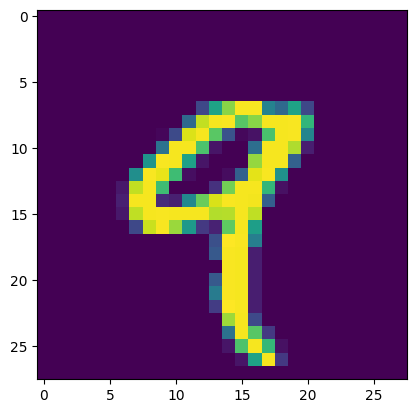

In [5]:
plt.imshow(X_train[4])

For a neural network to converge early it is very necessary to bring the values in a similar range basicallly (0-1).

In [6]:
X_train=X_train/255
X_test=X_test/255

We need to convert the 2-D data points into 1-D basically from 28x28 to 1x784 which can be done by the keras flatten function


In [11]:
model = Sequential()

model.add(Flatten(input_shape =(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam')

In [14]:
model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.4708 - val_loss: 0.1661
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.1399 - val_loss: 0.1201
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0910 - val_loss: 0.1080
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0662 - val_loss: 0.1011
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.0506 - val_loss: 0.0923
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0356 - val_loss: 0.0925
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0290 - val_loss: 0.0968
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0234 - val_loss: 0.0940
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0188 - val_loss: 0.1014
Epoch 10/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0157 - val_loss: 0.1021


In [15]:
y_prob=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [18]:
y_pred = y_prob.argmax(axis=1)

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9788

## Improvements

In [21]:
model = Sequential()

model.add(Flatten(input_shape =(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam')

In [24]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.5289 - val_loss: 0.1426
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.1290 - val_loss: 0.1116
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0833 - val_loss: 0.1058
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.0605 - val_loss: 0.0946
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 10ms/step - loss: 0.0465 - val_loss: 0.0922
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - loss: 0.0370 - val_loss: 0.0955
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - loss: 0.0272 - val_loss: 0.1056
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 0.0258 - val_loss: 0.1006
Epoch 9/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0209 - val_loss: 0.1048
Epoch 10/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0167 - val_loss: 0.1039
Epoch 11/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0141 - val_loss: 0.1060
Epoch 12/25
1500/1500

In [25]:
y_prob=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [26]:
y_pred = y_prob.argmax(axis=1)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9807

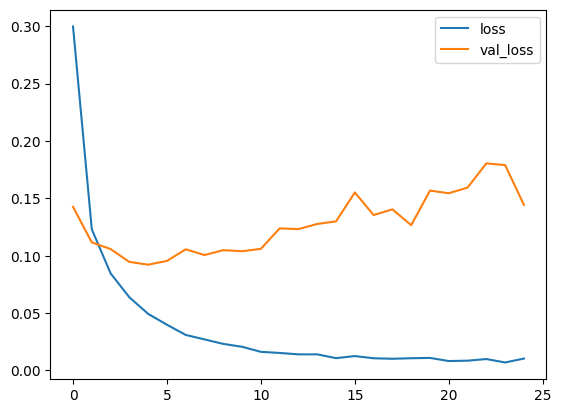

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])

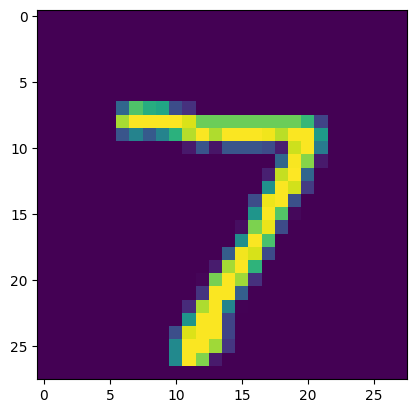

In [29]:
plt.imshow(X_test[0])

In [30]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


array([7])